<a href="https://colab.research.google.com/github/fiorellaperez1/DesercionEstudiantil/blob/main/Renzo/IA_2024_1_Deserci%C3%B3n_estudiantil_en_la_FISI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install openpyxl # Libreria para leer excel

# **Importar librerias**

In [ ]:
# import statements
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve,precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif

# **Importar los datos**

In [ ]:
data = pd.read_excel('/content/Encuesta de Analisis de Desercion.xlsx')
data.sample(7)

,Género,Edad,Escuela,Ciclo,Base,¿Cuál fue tu promedio ponderado el semestre pasado?,¿Cuántos cursos sueles llevar por semestre?,La carga académica en su semestre es excesiva y dificulta su rendimiento académico,¿Tenías experiencia previa en ciencias de la computación antes de comenzar tus estudios en carrera?,¿Qué tan difícil te resulta el contenido tratado en la carrera?,...,¿Has tenido periodos de ausencia prolongada?,"¿A qué estrato socioeconómico perteneces? (1,2 o 3, siendo 1 el más bajo y 3 el más alto)",¿Trabajas mientras estudias en la FISI?,"¿Recibe algún tipo de apoyo económico para sus estudios (beca, trabajo, ayuda familiar, etc.)?","¿Tienes responsabilidades familiares, como cuidado de niños o familiares mayores, que podrían afectar tus estudios en la FISI?","¿Has experimentado problemas de salud mental, como estrés, ansiedad o depresión, que hayan afectado tu rendimiento académico?","¿Te sientes parte activa de la comunidad en la FISI (eventos, organizaciones, integración)?",¿Cómo calificarías tu habilidad para gestionar tu tiempo y organizar tus tareas académicas?,¿Tienes metas personales y profesionales claras que te motiven a completar tus estudios en la FISI?,¿Has considerado abandonar tus estudios en la FISI en algún momento?
12,Femenino,21,E.A.P Ingeniería de Sistemas,VI,20,14.182,7,Totalmente de acuerdo,No,9,...,No,1,No,No,No,Sí,No,Regular,Sí,Sí
35,Femenino,22,E.A.P Ingeniería de Sistemas,VII,21,14.800,6,Neutral,No,8,...,No,2,Sí,Sí,No,Sí,No,Regular,Sí,No
34,Masculino,23,E.A.P Ingeniería de Sistemas,VI,21,17.000,8,Totalmente de acuerdo,No,8,...,No,3,No,No,No,No,No,Bueno,Sí,Sí
0,Femenino,21,E.A.P Ingeniería de Sistemas,VII,21,14.900,6,Neutral,Sí,7,...,No,2,No,Sí,Sí,No,Sí,Regular,Sí,No
15,Masculino,21,E.A.P Ingeniería de Sistemas,VII,21,14.669,7,Totalmente de acuerdo,No,8,...,No,2,No,Sí,Sí,Sí,No,Regular,No,No
16,Masculino,21,E.A.P Ingeniería de Sistemas,VI,21,14.485,7,De acuerdo,No,7,...,No,2,No,Sí,Sí,Sí,No,Regular,Sí,No
36,Masculino,22,E.A.P Ingeniería de Sistemas,VII,21,14.600,6,Neutral,No,8,...,No,2,No,Sí,No,Sí,Sí,Regular,No,No


In [ ]:
# Asignar nombres a las columnas
data.columns = ['sexo', 'edad', 'carrera', 'ciclo', 'base', 'promedio_ponderado','cursos_semestre','carga_academica',
                'experiencia_previa', 'dificultad_academica', 'extra_curricular','nivel_satisfaccion', 'ausencia','nivel_socioeconomico',  'trabajo',
                'apoyo_economico', 'responsabilidad_familiar', 'salud_mental', 'comunidad_activa', 'organizacion', 'metas_profesionales', 'desertar']
data.sample(5)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
22,Masculino,23,E.A.P Ingeniería de Sistemas,VII,21,12.864,7,De acuerdo,No,7,...,No,2,No,Sí,No,No,Sí,Regular,Sí,Sí
36,Masculino,22,E.A.P Ingeniería de Sistemas,VII,21,14.600,6,Neutral,No,8,...,No,2,No,Sí,No,Sí,Sí,Regular,No,No
7,Masculino,19,E.A.P Ingeniería de Sistemas,VII,21,11.318,7,De acuerdo,No,6,...,No,2,No,No,No,Sí,No,Regular,Sí,No
41,Masculino,22,E.A.P Ingeniería de Sistemas,VII,21,14.991,7,De acuerdo,No,6,...,No,2,No,Sí,No,No,No,Malo,Sí,No
33,Masculino,25,E.A.P Ingeniería de Sistemas,VII,20,13.000,5,Neutral,No,8,...,No,2,Sí,Sí,No,No,No,Regular,No,No


# **Preprocesamiento de datos**

In [ ]:
columas_a_mapear = ['carga_academica']

mapping = {
    'Totalmente en desacuerdo' : 1,
    'En desacuerdo': 2,
    'Neutral': 3,
    'De acuerdo': 4,
    'Totalmente de acuerdo': 5
}

data[columas_a_mapear] = data[columas_a_mapear].replace(mapping)

data.sample(5)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
2,Masculino,21,E.A.P Ingeniería de Sistemas,VII,21,15.151,7,3,Sí,6,...,No,2,No,Sí,No,No,No,Bueno,Sí,Sí
23,Femenino,21,E.A.P Ingeniería de Sistemas,VII,21,15.400,6,4,No,5,...,No,2,No,Sí,Sí,Sí,No,Regular,Sí,No
50,Femenino,21,E.A.P Ingeniería de Sistemas,VII,21,15.500,5,4,No,6,...,No,2,No,No,No,Sí,No,Regular,No,Sí
17,Masculino,21,E.A.P Ingeniería de Sistemas,VI,21,14.900,7,3,No,5,...,No,2,Sí,Sí,No,Sí,No,Regular,Sí,No
47,Femenino,24,E.A.P Ingeniería de Software,VIII,20,15.400,6,5,No,5,...,No,2,Sí,Sí,No,No,No,Regular,Sí,Sí


In [ ]:
columas_a_mapear = ['organizacion']

mapping = {
    'Muy malo' : 1,
    'Malo': 2,
    'Regular': 3,
    'Bueno': 4,
    'Excelente': 5
}

data[columas_a_mapear] = data[columas_a_mapear].replace(mapping)

data.sample(5)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
40,Masculino,22,E.A.P Ingeniería de Sistemas,VI,21,14.000,7,4,No,6,...,No,1,No,Sí,No,Sí,Sí,3,Sí,No
46,Masculino,22,E.A.P Ingeniería de Sistemas,VII,21,14.088,7,4,No,7,...,No,1,No,Sí,No,No,No,2,Sí,No
36,Masculino,22,E.A.P Ingeniería de Sistemas,VII,21,14.600,6,3,No,8,...,No,2,No,Sí,No,Sí,Sí,3,No,No
0,Femenino,21,E.A.P Ingeniería de Sistemas,VII,21,14.900,6,3,Sí,7,...,No,2,No,Sí,Sí,No,Sí,3,Sí,No
25,Masculino,24,E.A.P Ingeniería de Sistemas,VI,21,13.200,6,4,No,7,...,No,2,No,No,No,No,No,3,Sí,No


In [ ]:
columas_a_mapear = ['ciclo']

mapping = {
    'I' : 1,
    'II': 2,
    'III': 3,
    'IV': 4,
    'V': 5,
    'VI' : 6,
    'VII': 7,
    'VIII': 8,
    'IX': 9,
    'X': 10
}

data[columas_a_mapear] = data[columas_a_mapear].replace(mapping)

data.sample(5)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
18,Masculino,22,E.A.P Ingeniería de Sistemas,7,21,14.50,7,4,No,6,...,No,2,No,Sí,No,Sí,No,4,Sí,Sí
50,Femenino,21,E.A.P Ingeniería de Sistemas,7,21,15.50,5,4,No,6,...,No,2,No,No,No,Sí,No,3,No,Sí
10,Masculino,21,E.A.P Ingeniería de Sistemas,7,21,12.60,7,3,Sí,6,...,No,2,No,Sí,No,No,Sí,4,Sí,No
36,Masculino,22,E.A.P Ingeniería de Sistemas,7,21,14.60,6,3,No,8,...,No,2,No,Sí,No,Sí,Sí,3,No,No
44,Masculino,22,E.A.P Ingeniería de Sistemas,7,21,14.41,7,4,No,8,...,No,2,No,Sí,No,No,Sí,3,Sí,No


In [ ]:
import pandas as pd

columas_a_mapear = ['dificultad_academica','nivel_satisfaccion']

# Define el mapeo de puntajes a los rangos
mapeo_puntajes = {
    (1, 2): 1,
    (3, 4): 2,
    (5, 6): 3,
    (7, 8): 4,
    (9, 10): 5
}

# Define una función para mapear los valores según los rangos
def map_puntaje(valor):
    for rango, puntaje in mapeo_puntajes.items():
        if valor in range(rango[0], rango[1] + 1):
            return puntaje
    return valor

# Aplica el mapeo usando apply y la función definida
data[columas_a_mapear]= data[columas_a_mapear].replace(map_puntaje(mapeo_puntajes))

# Muestra un ejemplo de 5 filas aleatorias con los puntajes asignados
data.sample(5)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
11,Masculino,21,E.A.P Ingeniería de Sistemas,6,21,13.500,7,4,Sí,4,...,No,2,No,No,Sí,No,Sí,3,Sí,Sí
34,Masculino,23,E.A.P Ingeniería de Sistemas,6,21,17.000,8,5,No,4,...,No,3,No,No,No,No,No,4,Sí,Sí
18,Masculino,22,E.A.P Ingeniería de Sistemas,7,21,14.500,7,4,No,3,...,No,2,No,Sí,No,Sí,No,4,Sí,Sí
20,Masculino,19,E.A.P Ingeniería de Sistemas,7,21,15.662,7,5,Sí,2,...,No,2,No,Sí,No,Sí,No,3,Sí,Sí
6,Masculino,42,E.A.P Ingeniería de Sistemas,7,21,14.300,8,4,No,2,...,No,2,Sí,Sí,Sí,No,No,2,Sí,No


In [ ]:
label_encoder = LabelEncoder()
data['carrera'] = label_encoder.fit_transform(data['carrera'])
data['sexo'] = label_encoder.fit_transform(data['sexo'])
data['experiencia_previa'] = label_encoder.fit_transform(data['experiencia_previa'])
data['extra_curricular'] = label_encoder.fit_transform(data['extra_curricular'])
data['ausencia'] = label_encoder.fit_transform(data['ausencia'])
data['trabajo'] = label_encoder.fit_transform(data['trabajo'])
data['apoyo_economico'] = label_encoder.fit_transform(data['apoyo_economico'])
data['responsabilidad_familiar'] = label_encoder.fit_transform(data['responsabilidad_familiar'])
data['salud_mental'] = label_encoder.fit_transform(data['salud_mental'])
data['comunidad_activa'] = label_encoder.fit_transform(data['comunidad_activa'])
data['metas_profesionales'] = label_encoder.fit_transform(data['metas_profesionales'])
data['desertar'] = label_encoder.fit_transform(data['desertar'])
data.sample(5)
#1(Si) - 0(No)

,sexo,edad,carrera,ciclo,base,promedio_ponderado,cursos_semestre,carga_academica,experiencia_previa,dificultad_academica,...,ausencia,nivel_socioeconomico,trabajo,apoyo_economico,responsabilidad_familiar,salud_mental,comunidad_activa,organizacion,metas_profesionales,desertar
43,1,22,0,7,20,15.400,7,3,0,2,...,0,2,0,1,0,1,0,3,1,0
5,1,22,0,6,21,13.800,7,3,0,3,...,0,2,0,1,0,1,1,3,1,1
16,1,21,0,6,21,14.485,7,4,0,4,...,0,2,0,1,1,1,0,3,1,0
18,1,22,0,7,21,14.500,7,4,0,3,...,0,2,0,1,0,1,0,4,1,1
24,1,27,0,7,21,14.800,7,3,0,3,...,0,1,1,1,0,0,0,3,1,0


# *Graficas relevantes sobre las columnas*

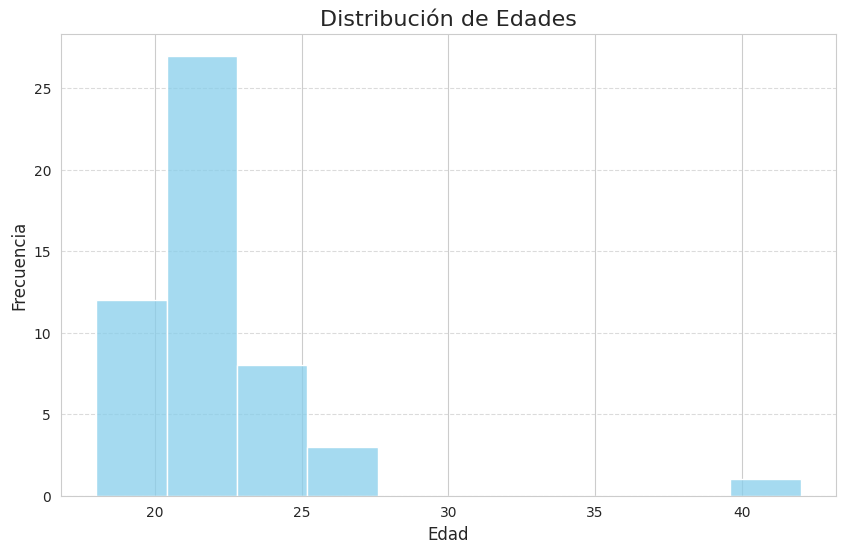

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo del gráfico
sns.set_style("whitegrid")

# Gráfico de barras para las edades
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según sea necesario
sns.histplot(data['edad'], bins=10, kde=False, color='skyblue', edgecolor='white')
plt.title('Distribución de Edades', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.xticks(fontsize=10)  # Ajustar el tamaño de la fuente en el eje x
plt.yticks(fontsize=10)  # Ajulstar el tamaño de la fuente en el eje y
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Añadir líneas de la cuadrícula en el eje y con estilo punteado
plt.show()

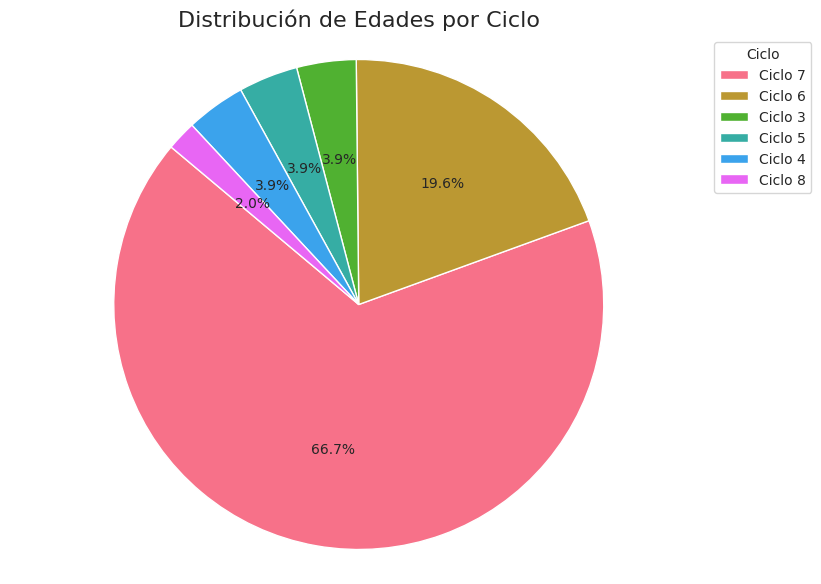

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la frecuencia de cada ciclo
ciclos_counts = data['ciclo'].value_counts()

# Obtener los valores y etiquetas de los ciclos
valores = ciclos_counts.values
etiquetas = ciclos_counts.index

# Colores para cada ciclo
colores = sns.color_palette("husl", len(etiquetas))

# Estilo del gráfico
sns.set_style("whitegrid")

# Crear el gráfico circular
plt.figure(figsize=(9, 7))
plt.pie(valores, labels=[''] * len(etiquetas), autopct='%1.1f%%', startangle=140, colors=colores, wedgeprops=dict(edgecolor='w'))
plt.title('Distribución de Edades por Ciclo', fontsize=16)
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Agregar leyenda de colores y porcentajes
plt.legend(title='Ciclo', labels=[f'Ciclo {c}' for c in ciclos_counts.index], loc='upper left', bbox_to_anchor=(1, 1))

plt.show()



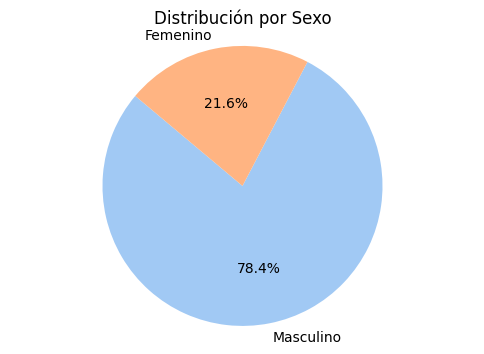

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de pastel para el sexo
plt.figure(figsize=(6, 4))  # Ajusta el tamaño de la figura según sea necesario

# Calcula los valores para el gráfico de pastel
sex_counts = data['sexo'].value_counts()
labels = ['Masculino', 'Femenino']

# Crea el gráfico de pastel
plt.pie(sex_counts, labels=labels, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=140)

plt.title('Distribución por Sexo')
plt.axis('equal')  # Asegura que el gráfico de pastel sea circular
plt.show()


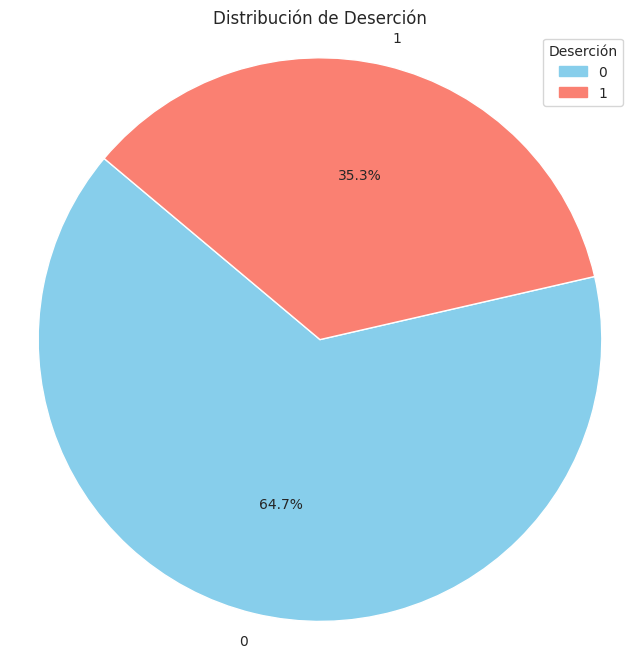

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Contar la frecuencia de deserción
desercion_counts = data['desertar'].value_counts()

# Obtener los valores y etiquetas de deserción
valores = desercion_counts.values
etiquetas = desercion_counts.index

# Colores para cada categoría de deserción
colores_desercion = {0: 'skyblue', 1: 'salmon'}  # Utilizamos los valores numéricos directamente

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(valores, labels=etiquetas, autopct='%1.1f%%', startangle=140, colors=[colores_desercion[label] for label in etiquetas])
plt.title('Distribución de Deserción')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Añadir leyenda
handles = [plt.Rectangle((0,0),1,1, color=colores_desercion[label]) for label in etiquetas]
plt.legend(handles, etiquetas, title='Deserción', loc='upper right')

plt.show()


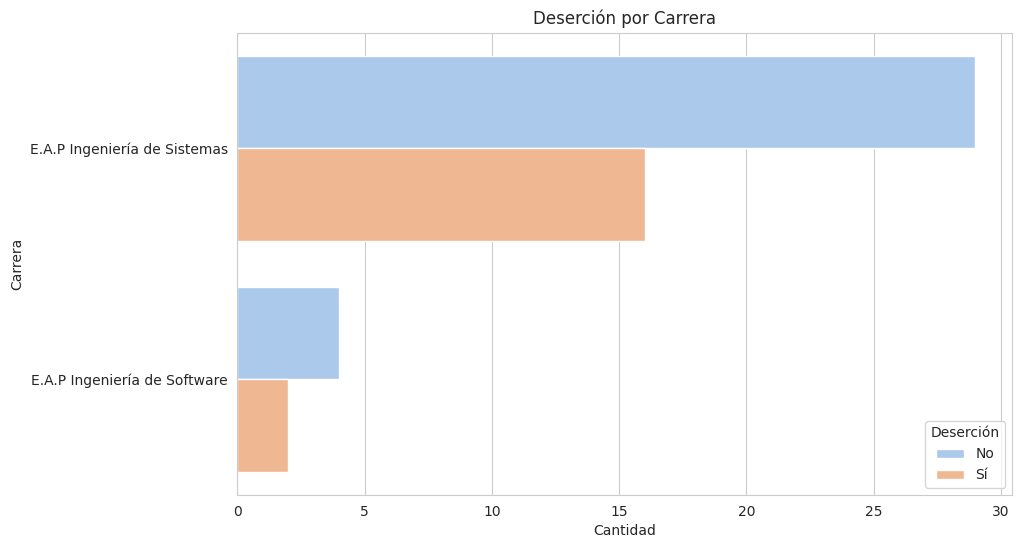

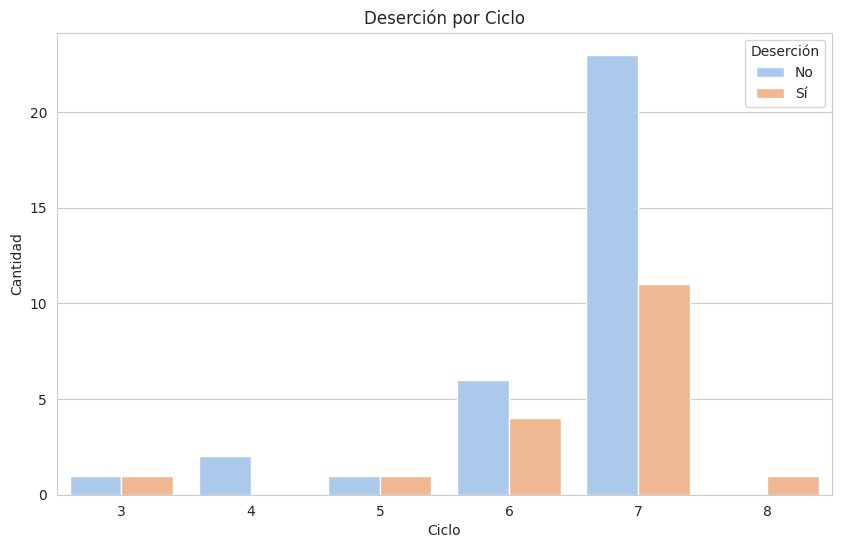

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Deserción por Carrera
plt.figure(figsize=(10, 6))
sns.countplot(data=data, y='carrera', hue='desertar', palette='pastel')
plt.title('Deserción por Carrera')
plt.xlabel('Cantidad')
plt.ylabel('Carrera')
plt.legend(title='Deserción')
plt.show()

# Deserción por Ciclo
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='ciclo', hue='desertar', palette='pastel')
plt.title('Deserción por Ciclo')
plt.xlabel('Ciclo')
plt.ylabel('Cantidad')
plt.legend(title='Deserción')
plt.show()



# **Crear el modelo**

In [ ]:
#Division de los datos
x = data.drop('desertar', axis=1) #entradas
y = data['desertar'] #salida

In [ ]:
# Dividir los datos en conjunto de entrenamiento y conjunto de prueba
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# Entrenar el modelo de regresión logística utilizando los datos de entrenamiento
LogReg = LogisticRegression(solver='lbfgs', max_iter=1000)
LogReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
# Calcular la precisión del modelo
accuracy = LogReg.score(x_test, y_test)

print('Presición:', accuracy)

Presición: 0.7272727272727273


In [ ]:
num_samples_test = len(x_test)  # o len(y_test) según el tipo de dato que quieras contar
print("Número de muestras en el conjunto de prueba:", num_samples_test)

Número de muestras en el conjunto de prueba: 11


# **Gráficos para evaluar el modelo**

In [ ]:
# Hacer predicciones en el conjunto de prueba
predicciones = LogReg.predict(x_test)

In [ ]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, predicciones)

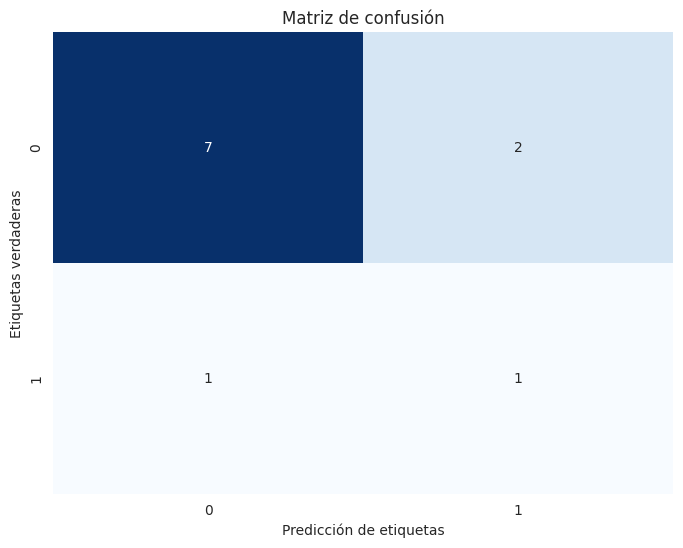

In [ ]:
# Visualizar la matriz de confusión usando seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicción de etiquetas')
plt.ylabel('Etiquetas verdaderas')
plt.title('Matriz de confusión')
plt.show()

In [ ]:
# Calcular las probabilidades de la clase positiva
y_probs = LogReg.predict_proba(x_test)[:, 1]

In [ ]:
# Calcular la precisión y la recuperación
precision, recall, _ = precision_recall_curve(y_test, y_probs)

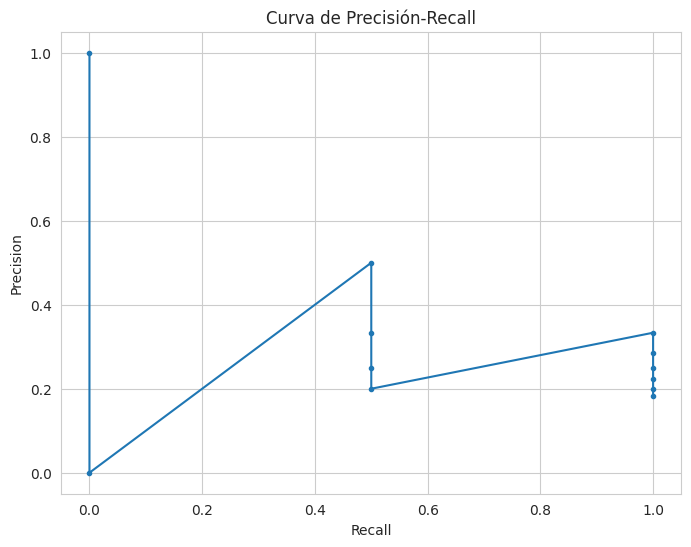

In [ ]:
# Graficar la curva de precisión-recall
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva de Precisión-Recall')
plt.grid(True)
plt.show()

In [ ]:
# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [ ]:
# Calcular el área bajo la curva ROC (AUC-ROC)
roc_auc = roc_auc_score(y_test, y_probs)

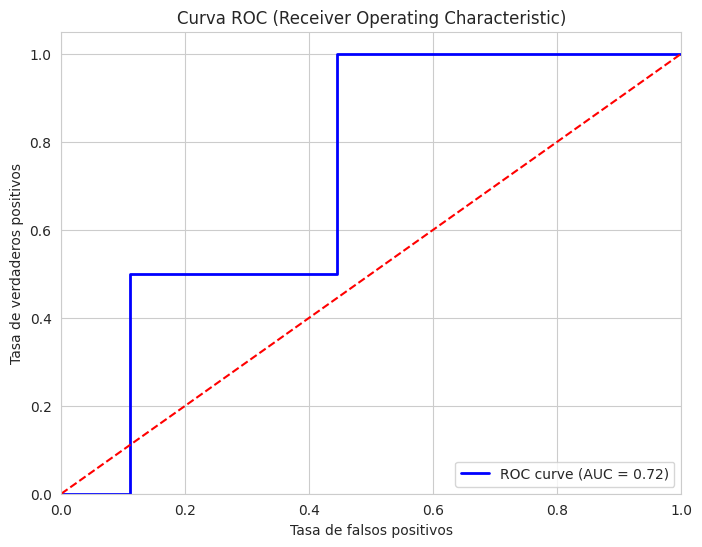

In [ ]:
# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC (Receiver Operating Characteristic)')
plt.legend(loc='lower right')
plt.show()

# **Métricas para evaluar el modelo**

In [ ]:
# Calcular métricas de evaluación
accuracy = accuracy_score(y_test, predicciones)
recall = recall_score(y_test, predicciones)
f1 = f1_score(y_test, predicciones)
conf_matrix = confusion_matrix(y_test, predicciones)

# Imprimir las métricas
print("Presicion:", accuracy)
print("Recall:", recall)
print("F1-score:", f1)
print("Matriz de confusion:\n", conf_matrix)

Presicion: 0.7272727272727273
Recall: 0.5
F1-score: 0.4
Matriz de confusion:
 [[7 2]
 [1 1]]


# **Guardar el modelo**

In [ ]:
from joblib import dump, load
dump(LogReg, 'modelo_predictivo.joblib')

['modelo_predictivo.joblib']

# **Casos Practicos de la prediccion del Modelo**

In [ ]:
#Cargar el modelo
model = load('modelo_predictivo.joblib')

In [ ]:
#Realizar una predicción
predic_alumno_01 = pd.DataFrame({
    'sexo': [1],
    'edad': [19],
    'carrera': [1],
    'ciclo': [5],
    'base': [22],
    'promedio_ponderado': [15.89],
    'cursos_semestre': [6],
    'carga_academica': [3],
    'experiencia_previa': [0],
    'dificultad_academica': [1],
    'extra_curricular': [1],
    'nivel_satisfaccion': [1],
    'ausencia': [1],
    'nivel_socioeconomico': [1],
    'trabajo': [1],
    'apoyo_economico': [1],
    'responsabilidad_familiar': [1],
    'salud_mental': [0],
    'comunidad_activa': [0],
    'organizacion': [1],
    'metas_profesionales': [0]
})
prediccion = model.predict(predic_alumno_01)

resultado_prediccion = "desertará" if prediccion[0] == 1 else "No Desertará"
print(f'La predicción: El estudiante {resultado_prediccion}')

La predicción: El estudiante No Desertará


In [ ]:
#Realizar una predicción
predic_alumno_02 = pd.DataFrame({
    'sexo': [1],
    'edad': [21],
    'carrera': [0],
    'ciclo': [2],
    'base': [20],
    'promedio_ponderado': [11.89],
    'cursos_semestre': [6],
    'carga_academica': [4],
    'experiencia_previa': [0],
    'dificultad_academica': [1],
    'extra_curricular': [1],
    'nivel_satisfaccion': [1],
    'ausencia': [1],
    'nivel_socioeconomico': [1],
    'trabajo': [1],
    'apoyo_economico': [0],
    'responsabilidad_familiar': [1],
    'salud_mental': [0],
    'comunidad_activa': [0],
    'organizacion': [0],
    'metas_profesionales': [0]
})
prediccion = model.predict(predic_alumno_02)

resultado_prediccion = "desertará" if prediccion[0] == 1 else "No Desertará"
print(f'La predicción: El estudiante {resultado_prediccion}')

La predicción: El estudiante desertará
